<a href="https://colab.research.google.com/github/Jovenstriker/neural-networks/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math

In [ ]:
def sig(x):
  return 1/(1+np.exp(-x))
def sigDerv(x):
  return sig(x)*(1-sig(x))
def reLU(x):
  if x>0:
    return x
  return 0
def reLUDerv(x):
  if x>0:
    return 1
  return 0

def leakyreLU(x):
  if x>0:
    return x
  return .01*x
def leakyreLUDerv(x):
  if x>0:
    return 1
  return 0.01






def cost(actual,predicted):
  return np.average((actual-predicted)**2)
def costDerv(actual,predicted):
  return 2*(predicted-actual)

def gradientClip(x):
  if x>1:
    return 1
  if x<-1:
    return -1
  if x<.05and x>0:
    return .05
  if x>-.05 and x<0:
    return -.05
  return x

In [ ]:
class layer:
  def __init__(self): #i is input size, o is output size
    self.inputWeight = np.random.rand()
    self.hiddenWeight = np.random.rand()
    self.bias = np.random.rand()
  def forward(self,input,pastInput):
    self.input = input
    self.pastInput = pastInput#This would be the previous new output, not the predicted value
    self.output = sig(self.inputWeight * self.input + self.pastInput + self.hiddenWeight +self.bias) #self.output is an o by 1 array of outputs, activated by sig function
    return self.output

In [ ]:
class finalLayer:
  def __init__(self):
    self.weight = np.random.rand()
    self.bias = np.random.rand()
  def forward(self,pastInput):
    self.input = pastInput
    self.output = (self.weight*self.input + self.bias)
    return self.output

In [ ]:
class NeuralNetwork:
  def __init__(self, layer, finalLayer):

    self.layer= layer
    self.finalLayer = finalLayer
    self.gradients = []
    self.dVs =[]
    self.dws = []
    self.dus = []
    self.dbHiddens = []
    self.dbFinals = []
  def add(self,layer):
    self.layers.append(layer)
  def train(self,input): #Input is a list of data points
    predictions =[]

    for x in range(len(input)-1):#Goes through each input of stock price to train

      output = 0
      lastOutput = 0
      for y in range(x+1): #Forward propagation
        lastOutput = output
        output = self.layer.forward(input[y],output)

      prediction = self.finalLayer.forward(output)
      # print("Predicted: " + str(prediction))
      predictions.append(prediction)
      error = input[1+x]-prediction
      errorGradient = costDerv(input[1+x],prediction)
      self.gradients.append(errorGradient)

      #back propagation
      hGradient = self.finalLayer.weight*errorGradient *sigDerv(self.layer.hiddenWeight*lastOutput+self.layer.inputWeight*input[x]+self.layer.bias)
      dV = errorGradient * output
      dw = hGradient*lastOutput
      du = hGradient*input[x]
      dbHidden = hGradient
      dbFinal = errorGradient

      self.finalLayer.weight-=(dV)
      self.dVs.append(gradientClip(dV))
      self.layer.hiddenWeight-=(dw)
      self.dws.append(gradientClip(dw))
      self.layer.inputWeight-=(du)
      self.dus.append(gradientClip(du))
      self.layer.bias -= (dbHidden)
      self.dbHiddens.append(gradientClip(dbHidden))
      self.finalLayer.bias-=(dbFinal)
      self.dbFinals.append(gradientClip(dbFinal))
    return predictions





In [ ]:
# #Trying to fix gradient
# class layer:
#   def __init__(self): #i is input size, o is output size
#     limit = np.sqrt(6/2)
#     self.inputWeight = np.random.uniform(-limit,limit)
#     self.hiddenWeight = np.random.uniform(-limit,limit)
#     self.bias = np.random.uniform(-limit,limit)
#   def forward(self,input,pastInput):
#     self.input = input
#     self.pastInput = pastInput#This would be the previous new output, not the predicted value
#     self.output = sig(self.inputWeight * self.input + self.pastInput + self.hiddenWeight +self.bias) #self.output is an o by 1 array of outputs, activated by sig function
#     return self.output
# class finalLayer:
#   def __init__(self):
#     limit = np.sqrt(3)
#     self.weight = np.random.uniform(-limit,limit)
#     self.bias = np.random.uniform(-limit,limit)
#   def forward(self,pastInput):
#     self.input = pastInput
#     self.output = (self.weight*self.input + self.bias)
#     return self.output

# class NeuralNetwork:
#   def __init__(self, layer, finalLayer):

#     self.layer= layer
#     self.finalLayer = finalLayer
#     self.gradients = []
#     self.dVs =[]
#     self.dws = []
#     self.dus = []
#     self.dbHiddens = []
#     self.dbFinals = []
#     self.error=[]
#   def add(self,layer):
#     self.layers.append(layer)
#   def train(self,input): #Input is a list of data points
#     predictions =[]

#     for x in range(1,len(input)-1):#Goes through each input of stock price to train

#       output = 0
#       lastOutput = 0
#       for y in range(x): #Forward propagation
#         lastOutput = output
#         output = self.layer.forward(input[y],output)

#       prediction = self.finalLayer.forward(output)
#       # print("Predicted: " + str(prediction))
#       predictions.append(prediction)
#       error = input[1+x]-prediction
#       self.error.append(error)
#       errorGradient = costDerv(input[1+x],prediction,x)
#       self.gradients.append(errorGradient)

#       #back propagation
#       hGradient = self.finalLayer.weight*errorGradient *sigDerv(self.layer.hiddenWeight*lastOutput+self.layer.inputWeight*input[x]+self.layer.bias)
#       dV = errorGradient * output
#       dw = hGradient*lastOutput
#       du = hGradient*input[x]
#       dbHidden = hGradient
#       dbFinal = errorGradient

#       self.finalLayer.weight-=.01*((dV))+.02*self.finalLayer.weight
#       self.dVs.append((dV))
#       self.layer.hiddenWeight-=.01*((dw)) +.02*self.layer.hiddenWeight
#       self.dws.append((dw))
#       self.layer.inputWeight-=.01*((du))+.02*self.layer.inputWeight
#       self.dus.append((du))
#       self.layer.bias -= .01*((dbHidden))+.02*self.layer.bias
#       self.dbHiddens.append((dbHidden))
#       self.finalLayer.bias-=.01*((dbFinal))+.02*self.finalLayer.bias
#       self.dbFinals.append((dbFinal))
#     return predictions





In [ ]:
import yfinance as yf
appl = yf.download(tickers = "AAPL",period = "5d", interval = "1d")
data = appl["Adj Close"].values
print(data)

[*********************100%***********************]  1 of 1 completed
[191.33000183 191.80999756 190.67999268 188.61000061 187.97999573]


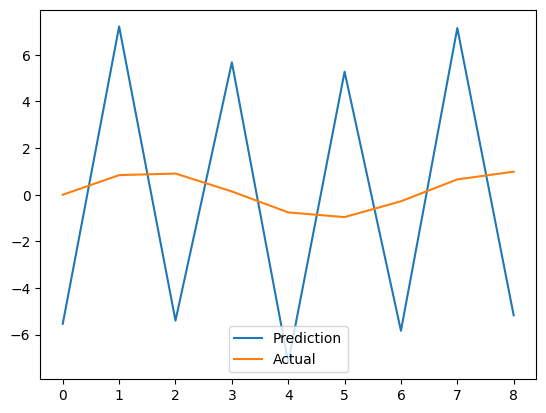

In [ ]:
netLayer = layer()
netFinalLayer = finalLayer()
net = NeuralNetwork(netLayer,netFinalLayer)

inputData = []
def quadratic(x):
  return x*x
for i in range(10):
    inputData.append(np.sin(i))
    # inputData.append((2)**i)
    # inputData.append(np.sin(i))
for x in range(10):
  predictions = net.train(inputData)
from matplotlib import pyplot as plt
plt.plot(predictions,label="Prediction")
plt.plot(inputData[:-1], label = "Actual")
leg = plt.legend(loc='lower center')
# plt.yscale('log')
plt.show()

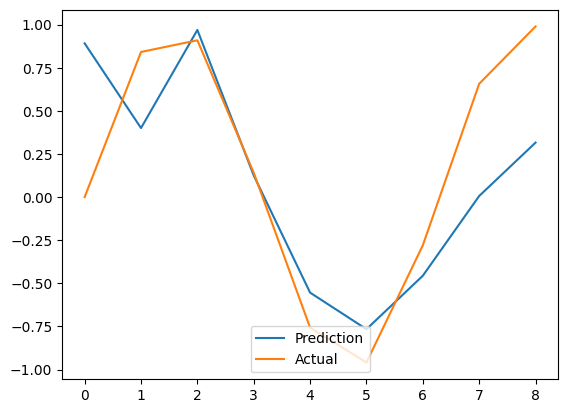

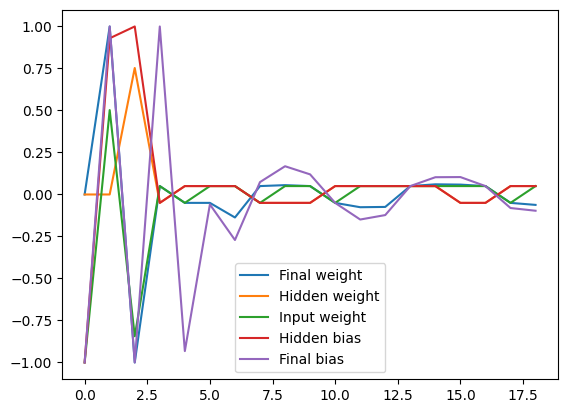

In [ ]:
plt.plot(net.dVs,label = "Final weight")
plt.plot(net.dws, label = "Hidden weight")
plt.plot(net.dus, label = "Input weight")
plt.plot(net.dbHiddens, label = "Hidden bias")
plt.plot(net.dbFinals, label = "Final bias")
leg = plt.legend(loc='lower center')
plt.show()